In [385]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 
from numpy.linalg import inv
def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False, y_logscale = False):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 18},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 18},loc='best',shadow=True)
    if (y_logscale):
        ax1.set_yscale('log')
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname

import numpy.polynomial.legendre as GL
def nf(E,kT=0.025,eta=None): 
    """ The Fermi distribution """
    if eta is None:
        # Ensures that numpy does not do anything with complex numbers!
        return 1./( np.exp( E / kT ) + 1 )
    return 1./( np.exp( (E+1j*eta) / kT) + 1)

In [386]:
PrintFigures=True
PointCharge=True

### parameter definition

In [387]:
h=1.06e-34
q=1.602e-19
G_quantum=2*q**2/h #at zero temperature
print('G_quantum',G_quantum)
print('R_quantum',1/G_quantum)
gamma=2.5 #eV
acc=0.142e-9
m=17
n=0
nano=1e-9

#N=num_layers_ch
#U=avg_field_ch

def get_radius(acc,m,n):
    return acc*(np.sqrt(3.)/(2*np.pi))*np.sqrt(m**2 + m*n + n**2)


R = get_radius(acc,m,n)
print('Radius of CNT (nm):', R/nano)

Eg_min = acc*gamma/R
print('bandgap, H/(eV):', Eg_min)

Us=0.0 #V, Source potential
Ud=0.0 #V, Drain potential

N=4
print('number of layers in the channel: ', N)

q_factor = math.gcd(m, n)
Int=(m-n)/(3*q_factor)
print('q_factor',q_factor)
print('Int',Int)
if(Int.is_integer()):
    d_R = 3*q_factor
else:
    d_R = q_factor
print('d_R',d_R)
Natoms_per_UC=int(4*(m**2+m*n+n**2)/d_R)
print('number of atoms per unit cell',Natoms_per_UC)


if(n==0): #zigzag
    M =  int(Natoms_per_UC/4)
elif(m==n): #armchair
    M = int(Natoms_per_UC/2)
else:
    M = np.abs(m-n)
print('number of total modes or atoms along the ring', M)
M_red = 1
print('number of modes used to construct hamiltonian', M_red)

nring_per_unitcell = 4 #for a zigzag nanotube
print('nring_per_unitcell',nring_per_unitcell)

avg_distance_per_layer = 3*acc/nring_per_unitcell
print('avg_distance_per_layer',avg_distance_per_layer)
print('Total length', N*avg_distance_per_layer)



G_quantum 0.00048422716981132076
R_quantum 2065.1464071907617
Radius of CNT (nm): 0.665453976774103
bandgap, H/(eV): 0.5334704012453583
number of layers in the channel:  4
q_factor 17
Int 0.3333333333333333
d_R 17
number of atoms per unit cell 68
number of total modes or atoms along the ring 17
number of modes used to construct hamiltonian 1
nring_per_unitcell 4
avg_distance_per_layer 1.065e-10
Total length 4.26e-10


### #Theoretical career concentration


0.26673520062267914
n_mul_factor 0.014979288761590147


/tmp/ipykernel_11367/2158020781.py:67: RuntimeWarning: overflow encountered in exp
  return 1./( np.exp( (E+1j*eta) / kT) + 1)


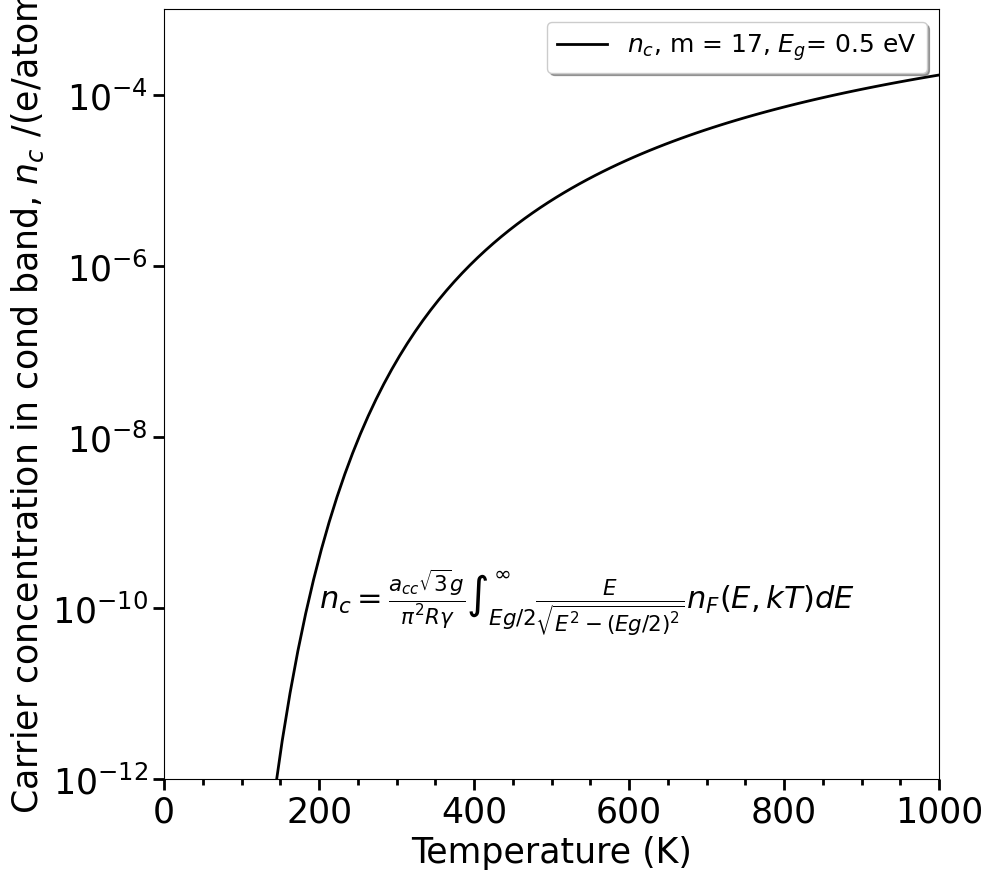

In [399]:
mu=0
e=1.6e-19
pts = 100
Temp_arr=np.linspace(1,1000,pts,dtype=float)
n_per_atom_cond = np.zeros(pts,dtype=float)
n_per_atom_vale = np.zeros(pts,dtype=float)

k=8.617333262e-5 #eV/K
g=1 #degeneracy of subband
Ec_th = Eg_min/2.
print(Ec_th)
#(4.*e/(3.*np.sqrt(3)*acc))*
n_mul_factor = (acc*np.sqrt(3)*g/(np.pi**2 *R* gamma))
print('n_mul_factor',n_mul_factor)

realaxis_pts =1000
c=np.linspace(0, 100., realaxis_pts,dtype=float)
deltac=c[1]-c[0]
v=np.linspace(-100, 0, realaxis_pts,dtype=float)
deltav=v[1]-v[0]

for t in range(0, len(Temp_arr)):
    Temp = Temp_arr[t]
    kT = k*Temp
    n_per_atom_cond[t]=0.
    n_per_atom_vale[t]=0.

    for e in range(0,realaxis_pts):
        n_per_atom_cond[t] += n_mul_factor*nf(np.sqrt( c[e]**2 + Ec_th**2 ), eta=0., kT=kT).real*deltac
        n_per_atom_vale[t] += n_mul_factor*(1-nf(np.sqrt( v[e]**2 + Ec_th**2 ) , eta=0., kT=kT).real)*deltav
    
if(PrintFigures):
    plt,pltname=custom_plot_single([Temp_arr], 
                       [n_per_atom_cond],
                       [r'$n_c$, m = %d, $E_g$= %.1f eV'%(m,Eg_min)],
                       [0,Temp_arr[-1]],[1e-12,1e-3],[r'Temperature (K)',r'Carrier concentration in cond band, $n_c$ /(e/atom)'],'CarrierConcCondBandVsTemp_%d_0.png'%(m),
                       ['k','r','g'],
                       ['solid','dashed','solid','dashed'],
                       [None,None],
                       4*['none'],
                       [2,2,2,2],y_logscale=True)
#     plt,pltname=custom_plot_single([Temp_arr,Temp_arr], 
#                        [n_per_atom_cond,n_per_atom_vale],
#                        [r'$n_c$, m = %d, $E_g$= %.1f eV'%(m,Eg_min),r'$n_v$, m = %d, $E_g$= %.1f eV'%(m,Eg_min)],
#                        [0,Temp_arr[-1]],[1e-12,1e-3],[r'Temperature (K)',r'Carrier concentration, $n_c$ & $n_v$ /(e/atom)'],'CarrierConcVsTemp_%d_0.png'%(m),
#                        ['k','r','g'],
#                        ['solid','dashed','solid','dashed'],
#                        [None,None],
#                        4*['none'],
#                        [2,2,2,2],y_logscale=True)
    
    #plt.text(100, 5e-3, r'$n_v = \frac{a_{cc}\sqrt{3}g}{\pi^2R\gamma}\int_{-\infty}^{-Eg/2}\frac{E}{\sqrt{E^2 - (Eg/2)^2}} (1-n_F(E,kT)) dE$', fontsize=22,color='k')    
    plt.text(200, 1e-10, r'$n_c = \frac{a_{cc}\sqrt{3}g}{\pi^2R\gamma}\int_{Eg/2}^{\infty}\frac{E}{\sqrt{E^2 - (Eg/2)^2}} n_F(E,kT) dE$', fontsize=22,color='k')
    plt.savefig(pltname, bbox_inches = "tight")
    


In [400]:
print(n_per_atom_cond[-1],n_per_atom_cond[-1]*17)

0.00017142355877102308 0.002914200499107392


In [401]:
import pandas as pd
df = pd.read_csv('Francois_Data_ChargePerAtom.csv', header=None)
Francois_Ef = df[0]
Francois_ChargePerAtom = df[1]
print(Francois_Ef)

0    0.191905
1    0.221156
2    0.240431
3    0.255964
4    0.268209
5    0.278980
Name: 0, dtype: float64


In [402]:
import numpy.polynomial.laguerre as GLag
def func(mu, kT, Ec_th, deg=11):
    X,W = GLag.laggauss(deg)        
    summation = 0.
    for i in range(0,np.size(X)):
        x=X[i]
        w=W[i]
        #print(x,w)
        summation += w*np.exp(x)*(nf( (np.sqrt( x**2 + Ec_th**2 ) - mu), eta=0., kT=kT).real)
    #print(summation)
    return summation

/tmp/ipykernel_11367/2158020781.py:67: RuntimeWarning: overflow encountered in exp
  return 1./( np.exp( (E+1j*eta) / kT) + 1)


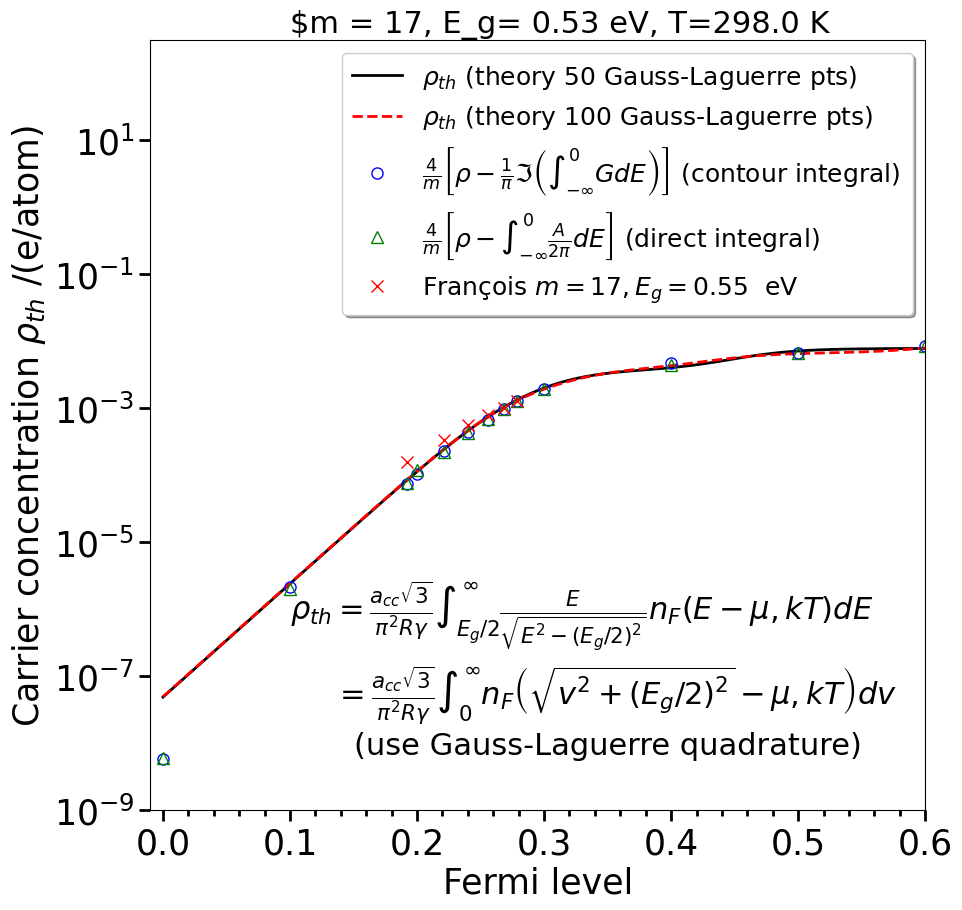

In [406]:
mu_sim = np.array([0,0.1,0.191905, 0.2,0.221156, 0.240431, 0.255964, 0.268209, 0.278980,  0.3,0.4,0.5,0.6])
#the following values are before multiplying by 4/m.
nc_sim = np.array([2.54388087e-08, 8.63970729e-06,0.00032122, 0.00050732,   0.00094354,0.00182354, 0.00294605, 0.00411889, 0.00533681,      0.00815898,0.01836968,0.0282172,0.03610369]) #Direct Integral - A
nc_sim_CI = np.array([2.47214177e-08, 9.23624234e-06,0.00030937,0.0004355, 0.00096945,0.00187346,0.00284987, 0.00407827, 0.0054502,     0.00802641,0.01956483,0.02827691,0.03612615]) #Direct integral - 0.5

mu_arr=np.linspace(0,0.6,pts,dtype=float)
n_per_atom_cond_Fermi = np.zeros(pts,dtype=float)
n_per_atom_cond_Fermi_conv = np.zeros(pts,dtype=float)

Temp_ref = 298
#realaxis_pts =int(1e5)

for f in range(0, len(mu_arr)):
    mu = mu_arr[f]
    kT = k*Temp_ref
    n_per_atom_cond_Fermi[f] = n_mul_factor*func(mu, kT, Ec_th,50)
    n_per_atom_cond_Fermi_conv[f] = n_mul_factor*func(mu, kT, Ec_th,100)
    #c=np.linspace(0, int(1e4), realaxis_pts,dtype=float)
    #deltac=c[1]-c[0]
    #for e in range(0,realaxis_pts):
        #n_per_atom_cond_Fermi[f] += n_mul_factor * nf( (np.sqrt( c[e]**2 + Ec_th**2 ) - mu), eta=0., kT=kT).real * deltav

#print(n_per_atom_cond_Fermi)


if(PrintFigures):
    plt, pltname=custom_plot_single([mu_arr, mu_arr, mu_sim, mu_sim, Francois_Ef], 
                    [n_per_atom_cond_Fermi, n_per_atom_cond_Fermi_conv, nc_sim_CI*4/m, nc_sim*4/m, Francois_ChargePerAtom],
                    [r'$\rho_{th}$ (theory 50 Gauss-Laguerre pts)',r'$\rho_{th}$ (theory 100 Gauss-Laguerre pts)',
                     r'$\frac{4}{m}\left[\rho-\frac{1}{\pi} \Im\left(\int_{-\infty}^{0} G dE\right)\right] $ (contour integral) ',
                     r'$\frac{4}{m} \left[\rho -\int_{-\infty}^{0} \frac{A}{2\pi} dE\right]$ (direct integral) ',
                    r'Franc$\c{}$ois $m=17, E_g=0.55$  eV'],
                    [mu_arr[0]-0.01,mu_arr[-1]],
                    [1e-9,3e2],
                    [r'Fermi level',r'Carrier concentration $\rho_{th}$ /(e/atom)'],'CarrierConcCondBandVsFermiLevel_%d_0.png'%(m),
                    ['k','r','b','g','r'],
                    ['solid','dashed','none','none','none'],
                    [None,None,'o', '^','x'],
                    6*['none'],
                    [2,2,2,2,2,2],markevery=[1,1,1,1,1,1],y_logscale=True)

    plt.text(0.1, 7e-7, r'$\rho_{th} = \frac{a_{cc}\sqrt{3}}{\pi^2R\gamma}\int_{E_g/2}^{\infty}\frac{E}{\sqrt{E^2 - (E_g/2)^2}} n_F(E - \mu,kT) dE$', fontsize=22,color='k')
    plt.text(0.135, 4e-8, r'$ = \frac{a_{cc}\sqrt{3}}{\pi^2R\gamma}\int_{0}^{\infty} n_F\left(\sqrt{v^2 + (E_g/2)^2} - \mu,kT\right) dv$', fontsize=22,color='k')
    plt.text(0.15, 7e-9, r'(use Gauss-Laguerre quadrature)', fontsize=22,color='k')

    plt.text(0.1, 400, r'$m = %d, E_g= %.2f eV, T=%.1f K'%(m,Eg_min, Temp_ref), fontsize=22,color='k')

    plt.savefig(pltname, bbox_inches = "tight")

In [393]:
n_per_atom_cond_Fermi[-1]*17*4

0.5238266835328249